In [169]:
#pip install google-services-api
#!pip install xlrd

In [1]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from config import g_key
from config import outscraper_key
from datetime import datetime
import gmaps

from outscraper import ApiClient



In [2]:
target_venue = "Fiddler's Green Amphitheatre, Colorado"
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_venue, g_key)

geo_data = requests.get(target_url).json()
#pprint(geo_data)

In [3]:
target_venue = "Fiddler's Green Amphitheatre, Colorado"
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_venue, g_key)

geo_data = requests.get(target_url).json()

lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    Venue: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_venue, lat, lng))


    Venue: Fiddler's Green Amphitheatre, Colorado
    Latitude: 39.6005057
    Longitude: -104.8943496
    


In [4]:
target_venue2 = "The Mishawaka, Colorado"
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_venue2, g_key)

geo_data = requests.get(target_url).json()

lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    Venue: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_venue2, lat, lng))


    Venue: The Mishawaka, Colorado
    Latitude: 40.687525
    Longitude: -105.36556
    


In [5]:
venues = ["Fiddler's Green Amphitheatre", "The Mishawaka", "Ogden Theatre", "Fillmore Auditorium"]

venue_ids = ["ChIJOZ2mWoiGbIcRnK8qOzprxr8", "ChIJ-7mpJaA9aYcRIAXM6vR2MQA", 
             "ChIJc1frSS15bIcRvEDDqHoi9qc", "ChIJPzbl2yx5bIcRsTOtTjPWiqU" ]

lats = []
lngs = []
rating = []


for venue_id in venue_ids:
    
    response = requests.get(('https://maps.googleapis.com/maps/api/place/details/json?'
    'place_id={0}&key={1}').format(venue_id, g_key)).json()
    lats.append(response["result"]["geometry"]["location"]["lat"])
    lngs.append(response["result"]["geometry"]["location"]["lng"])
    rating.append(response["result"]['rating'])
venue_dict = {"Venue": venues,
             "Lat": lats,
             "Lng": lngs,
             "Venue Rating": rating}

venues_summary_df = pd.DataFrame(venue_dict)
venues_summary_df

,Venue,Lat,Lng,Venue Rating
0,Fiddler's Green Amphitheatre,39.600506,-104.894350,4.3
1,The Mishawaka,40.687525,-105.365560,4.6
2,Ogden Theatre,39.740170,-104.975270,4.5
3,Fillmore Auditorium,39.740201,-104.977219,4.5


In [6]:
#venues = venues_summary_df[["Lat", "Lng"]]
#rating = venues_summary_df["Venue Rating"].astype(float)
gmaps.configure(api_key=g_key)
locations = venues_summary_df[["Lat", "Lng"]].astype(float)
fig = gmaps.figure(center=(39.7,-105),zoom_level=7)

info_box_template = """
<dl>
<dt>Name</dt><dd>{Venue}</dd>
<
</dl>
"""
venue_info = [info_box_template.format(**row) for index, row in venues_summary_df.iterrows()]

#fig.add_layer(heat_layer)
venue_spots = gmaps.marker_layer(locations, info_box_content=venue_info)
fig.add_layer(venue_spots)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
#places_data = response.json()

# Print the json (pretty printed)
#print(json.dumps(places_data, indent=4, sort_keys=True))

In [8]:


query_url = "https://maps.googleapis.com/maps/api/place/details/json"
place_id = "ChIJOZ2mWoiGbIcRnK8qOzprxr8"

params = {
    "place_id": place_id,
    "key": g_key}

response = requests.get(query_url, params)
fiddlers_green_data = response.json()

#print(json.dumps(redrocks_data, indent=4, sort_keys=True))


In [9]:
date = datetime.utcfromtimestamp(1595471580).date()
date.year

2020

In [10]:
print(fiddlers_green_data['result']['rating'])
print(fiddlers_green_data['result']['geometry']["location"]["lat"])

4.3
39.6005057


In [11]:
#pprint(fiddlers_green_data)

In [12]:
#fiddlers_data = "C:/Users/paul_/workspace/ATeamProjectPy/input_data_reviews/Fiddlers_Green_Reviews.xlsx"
fiddlers_df = pd.read_excel("input_data/Fiddler's Green Reviews.xlsx")
fiddlers_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes
0,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117889063...,Carla Romero,111788906317735192731,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577753856,12/31/2019 00:57:36,0
1,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1052544996...,kayla scott,105254499609271761375,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577652536,12/29/2019 20:48:56,0
2,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1001612728...,Justin Brandenburg,100161272803201103908,Fun venue,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577590672,12/29/2019 03:37:52,0
3,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117712780...,Nathaly Mora,111771278008972827620,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577564182,12/28/2019 20:16:22,0
4,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1173905419...,Chrissy,117390541915050839567,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577517538,12/28/2019 07:18:58,0


In [13]:
# Function to convert UTC Timestamp to a YearMonth number
def timeDiff(row):

    review_date = datetime.utcfromtimestamp(row["review_timestamp"]).date()
    return review_date.year*100+review_date.month


In [14]:
fiddlers_df["Review Date"]=fiddlers_df.apply(timeDiff, axis=1)
fiddlers_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,Review Date
0,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117889063...,Carla Romero,111788906317735192731,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577753856,12/31/2019 00:57:36,0,201912
1,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1052544996...,kayla scott,105254499609271761375,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577652536,12/29/2019 20:48:56,0,201912
2,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1001612728...,Justin Brandenburg,100161272803201103908,Fun venue,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577590672,12/29/2019 03:37:52,0,201912
3,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117712780...,Nathaly Mora,111771278008972827620,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577564182,12/28/2019 20:16:22,0,201912
4,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1173905419...,Chrissy,117390541915050839567,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577517538,12/28/2019 07:18:58,0,201912


In [15]:
fiddlers_reviews = fiddlers_df[["review_rating","Review Date"]]

fiddlers_reviews.head()

,review_rating,Review Date
0,4,201912
1,5,201912
2,5,201912
3,5,201912
4,5,201912


In [16]:
#month_counts = fiddlers_reviews['Review Date'].value_counts()
fiddlers_counts = fiddlers_reviews.copy()

ranges = [201800, 201804, 201807, 201810, 201901, 201904, 201907, 201910, 201912]
bins = ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018", "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"]

fiddlers_counts["Seasonal Ratings"] = pd.cut(fiddlers_counts["Review Date"], ranges, labels = bins)



fidd_seas_counts = fiddlers_counts.groupby(["Seasonal Ratings"]).count()
fidd_seas_counts = fidd_seas_counts.drop('review_rating', 1)
fidd_seas_counts = fidd_seas_counts.rename(columns={"Review Date": "Total Reviews"})
fidd_seas_counts

,Total Reviews
Seasonal Ratings,
Winter 2018,130
Spring 2018,542
Summer 2018,731
Fall 2018,86
Winter 2019,93
Spring 2019,344
Summer 2019,658
Fall 2019,59


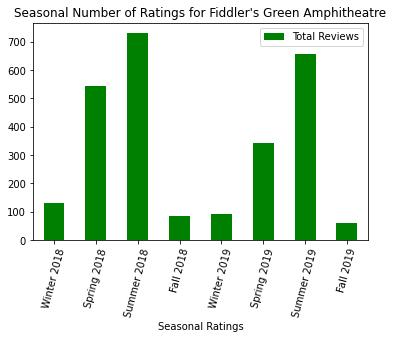

In [17]:
fidd_seas_plot = fidd_seas_counts.plot.bar(color = 'green', 
                                           title = "Seasonal Number of Ratings for Fiddler's Green Amphitheatre",
                                           rot=75)

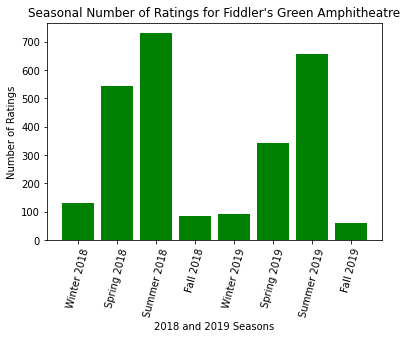

In [18]:
x_axis = np.arange(8)
review_count = fidd_seas_counts['Total Reviews']

plt.bar(x_axis, review_count, color = 'g')
plt.title("Seasonal Number of Ratings for Fiddler's Green Amphitheatre")
plt.xlabel("2018 and 2019 Seasons")
plt.ylabel("Number of Ratings")
seasonal_values = [value for value in x_axis]
plt.xticks(seasonal_values, ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018",
                             "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"],
                             rotation = 75);

In [95]:

#month_counts = fiddlers_reviews['Review Date'].value_counts()
#month_counts

In [96]:
#months_chart = month_counts.plot(kind='bar')
#plt.tight_layout()

In [19]:
fidd_seasonal_avg = fiddlers_counts.groupby(['Seasonal Ratings']).mean()['review_rating']
fidd_seasonal_avg

Seasonal Ratings
Winter 2018    4.261538
Spring 2018    4.291513
Summer 2018    4.355677
Fall 2018      4.546512
Winter 2019    4.311828
Spring 2019    4.345930
Summer 2019    4.500000
Fall 2019      4.542373
Name: review_rating, dtype: float64

In [20]:
fiddlers_reviews['review_rating'].mean()

4.381384790011351

In [198]:
#plt.scatter(fiddlers_df["review_rating"],fiddlers_df["Review Date"])

In [21]:
mishawaka_df = pd.read_excel("input_data/Mishawaka Reviews.xlsx")
mishawaka_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes
0,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1023825207...,Kristi Carouth,102382520727064300253,Really cool place and awesome drinks!,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577827467,12/31/2019 21:24:27,0
1,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1056163773...,Matt L,105616377394790236952,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577827026,12/31/2019 21:17:06,0
2,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1169010397...,David THOMS,116901039765701464124,Stopped in with my family to check out the fes...,https://lh5.googleusercontent.com/p/AF1QipP636...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577514481,12/28/2019 06:28:01,0
3,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1014028770...,Kantesh Oad,101402877065133855960,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577345249,12/26/2019 07:27:29,0
4,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1082063904...,Charles Pagel,108206390432969790499,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577324409,12/26/2019 01:40:09,0


In [22]:
mishawaka_df["Review Date"]=mishawaka_df.apply(timeDiff, axis=1)
mishawaka_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,Review Date
0,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1023825207...,Kristi Carouth,102382520727064300253,Really cool place and awesome drinks!,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577827467,12/31/2019 21:24:27,0,201912
1,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1056163773...,Matt L,105616377394790236952,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577827026,12/31/2019 21:17:06,0,201912
2,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1169010397...,David THOMS,116901039765701464124,Stopped in with my family to check out the fes...,https://lh5.googleusercontent.com/p/AF1QipP636...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577514481,12/28/2019 06:28:01,0,201912
3,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1014028770...,Kantesh Oad,101402877065133855960,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577345249,12/26/2019 07:27:29,0,201912
4,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1082063904...,Charles Pagel,108206390432969790499,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577324409,12/26/2019 01:40:09,0,201912


In [23]:
mishawaka_reviews = mishawaka_df[["review_rating", "Review Date"]]
mishawaka_reviews.head()

,review_rating,Review Date
0,5,201912
1,5,201912
2,5,201912
3,4,201912
4,4,201912


In [24]:
mishawaka_counts = mishawaka_reviews.copy()

ranges = [201800, 201804, 201807, 201810, 201901, 201904, 201907, 201910, 201912]
bins = ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018", "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"]

mishawaka_counts["Seasonal Ratings"] = pd.cut(mishawaka_counts["Review Date"], ranges, labels = bins)



mish_seas_counts = mishawaka_counts.groupby(["Seasonal Ratings"]).count()
mish_seas_counts = mish_seas_counts.drop('review_rating', 1)
mish_seas_counts = mish_seas_counts.rename(columns={"Review Date": "Total Reviews"})
mish_seas_counts

,Total Reviews
Seasonal Ratings,
Winter 2018,42
Spring 2018,98
Summer 2018,116
Fall 2018,41
Winter 2019,27
Spring 2019,133
Summer 2019,176
Fall 2019,39


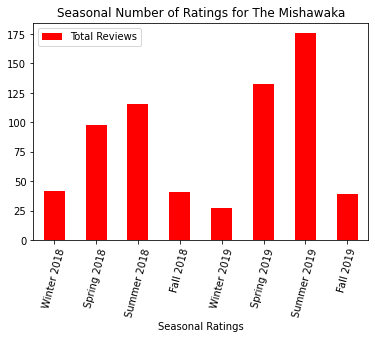

In [25]:
mish_seas_plot = mish_seas_counts.plot.bar(color = 'red', title = "Seasonal Number of Ratings for The Mishawaka",
                                           rot=75)

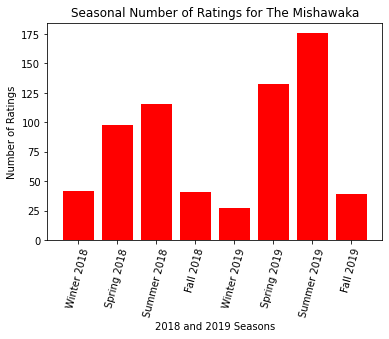

In [26]:
x_axis = np.arange(8)
review_count = mish_seas_counts['Total Reviews']

plt.bar(x_axis, review_count, color = 'r')
plt.title("Seasonal Number of Ratings for The Mishawaka")
plt.xlabel("2018 and 2019 Seasons")
plt.ylabel("Number of Ratings")
seasonal_values = [value for value in x_axis]
plt.xticks(seasonal_values, ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018",
                             "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"],
                             rotation = 75);

In [27]:
mish_seasonal_avg = mishawaka_counts.groupby(['Seasonal Ratings']).mean()['review_rating']
mish_seasonal_avg

Seasonal Ratings
Winter 2018    4.785714
Spring 2018    4.602041
Summer 2018    4.422414
Fall 2018      4.682927
Winter 2019    4.555556
Spring 2019    4.706767
Summer 2019    4.693182
Fall 2019      4.820513
Name: review_rating, dtype: float64

In [28]:
mishawaka_reviews["review_rating"].mean()

4.642857142857143